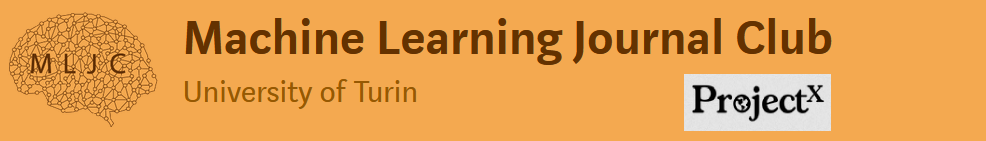

###ProjectX 2020 UofT AI Competition - File metadata

| Date created | Title | Type | Domain | Version |License / confidentiality
| --- | --- | --- | --- | --- | --- |
| 10.09.20 | Copernicus data access API | Example | GIS datasets | 1.0 | For internal use only, contains credentials |


Notebook di esempio estremamente semplice, con il solo scopo di testare l'accesso al dataset. Le immagini jp2 andrebbero associate ad un oggetto geodataframe di geopandas per poterne fare qualcosa, altrimenti così sono di difficile gestione

#Accedere ai dati di Copernicus con l'API

##### Installazione sentinelsat e rasterIO

In [ ]:
!pip3 install sentinelsat
!pip3 install rasterIO

##### Accesso e download

In [ ]:
from sentinelsat import SentinelAPI

#Initializing the API with credentials 
#(people from MLJC and ProjectX2020 Team are authorized to use my account!)
user = 'vpagliarino' 
password = 'copaccess2020valerio' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')
#Downloading data by key obtained at https://scihub.copernicus.eu/dhus/#/home
res = api.download("d66a1f73-f2f5-4e11-95fd-2f85ff9ab722")

In [ ]:
#Unzipping the archive
import zipfile
with zipfile.ZipFile(res['path'], 'r') as zip_ref:
  zip_ref.extractall('./')

In [ ]:
#Filtering all files (including subfolders) ending with given extension
a = []
import os
i = 0
for root, dirs, files in os.walk("./"):
    for file in files:
        if file.endswith(".jp2"):
             print(i, ") ", os.path.join(root, file))
             i=i+1
             a.append(os.path.join(root, file))

0 )  ./S2B_MSIL2A_20200910T064629_N0214_R020_T40RDN_20200910T092724.SAFE/GRANULE/L2A_T40RDN_A018350_20200910T065646/IMG_DATA/R20m/T40RDN_20200910T064629_B8A_20m.jp2
1 )  ./S2B_MSIL2A_20200910T064629_N0214_R020_T40RDN_20200910T092724.SAFE/GRANULE/L2A_T40RDN_A018350_20200910T065646/IMG_DATA/R20m/T40RDN_20200910T064629_B06_20m.jp2
2 )  ./S2B_MSIL2A_20200910T064629_N0214_R020_T40RDN_20200910T092724.SAFE/GRANULE/L2A_T40RDN_A018350_20200910T065646/IMG_DATA/R20m/T40RDN_20200910T064629_AOT_20m.jp2
3 )  ./S2B_MSIL2A_20200910T064629_N0214_R020_T40RDN_20200910T092724.SAFE/GRANULE/L2A_T40RDN_A018350_20200910T065646/IMG_DATA/R20m/T40RDN_20200910T064629_SCL_20m.jp2
4 )  ./S2B_MSIL2A_20200910T064629_N0214_R020_T40RDN_20200910T092724.SAFE/GRANULE/L2A_T40RDN_A018350_20200910T065646/IMG_DATA/R20m/T40RDN_20200910T064629_TCI_20m.jp2
5 )  ./S2B_MSIL2A_20200910T064629_N0214_R020_T40RDN_20200910T092724.SAFE/GRANULE/L2A_T40RDN_A018350_20200910T065646/IMG_DATA/R20m/T40RDN_20200910T064629_B12_20m.jp2
6 )  ./S2B

In [ ]:
import rasterio
import numpy as np
arrs = []

filenum = 25  #Indice corripondente all'elenco ^^


with rasterio.open(a[filenum]) as f:  
     arrs.append(f.read(1))

data = np.array(arrs, dtype=arrs[0].dtype)
data

array([[[3500, 3379, 3398, ...,  448,  446,  468],
        [3328, 3404, 3473, ...,  433,  452,  481],
        [3243, 3451, 3386, ...,  456,  461,  453],
        ...,
        [1701, 1596, 1532, ...,  238,  241,  241],
        [1578, 1689, 1620, ...,  238,  245,  240],
        [1597, 1722, 1701, ...,  239,  241,  246]]], dtype=uint16)

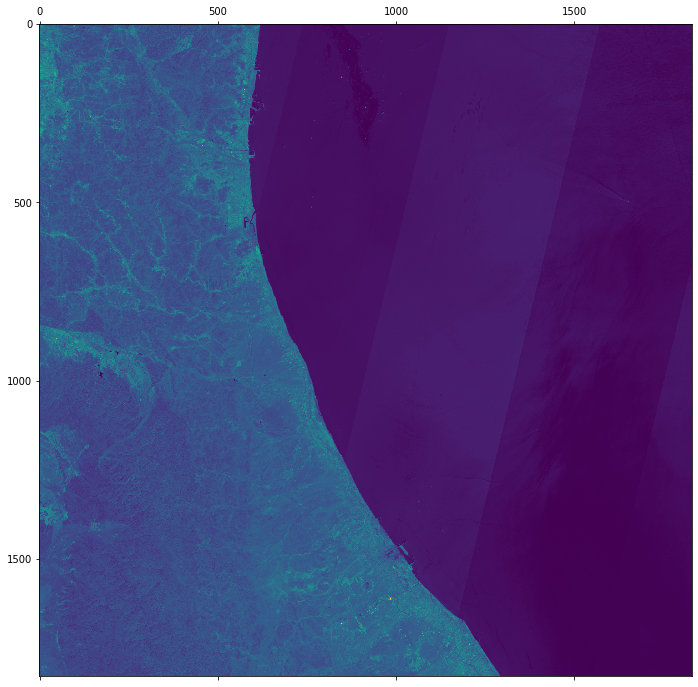

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.matshow(data[0])